In [38]:
#import thu vien
import pandas as pd
import numpy as np
import seaborn as sns

In [39]:
#doc du lieu tu file csv
house = pd.read_csv("final_house_loan.csv")
house.head()

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,F,19,1641.25,Low,1651.25,Rural,59641.82,21026.420753
1,M,29,1989.71,Low,1990.71,Urban,179858.51,60595.183366
2,F,37,1849.91,Low,1856.91,Rural,117297.62,39181.648002
3,M,65,2735.18,High,2747.18,Rural,354417.72,128497.710865
4,F,62,4741.78,High,4740.78,Urban,82049.80,39386.919336


In [40]:
house.describe(include=[object])

,Gender,Income Stability,Property Location
count,47297,47285,47294
unique,2,2,3
top,F,Low,Semi-Urban
freq,23669,43078,16371


In [41]:
house.describe()

,Age,Income (USD),Property Age,Property Price,Loan Sanction Amount (USD)
count,47297.000000,47265.000000,47263.000000,4.729700e+04,47297.000000
mean,40.000063,2586.684384,2586.611058,1.350880e+05,46487.229765
std,16.086128,1558.768809,1558.842286,9.457875e+04,32549.905634
min,18.000000,372.700000,370.700000,7.859620e+03,254.586578
25%,24.000000,1653.740000,1652.820000,6.250408e+04,21782.822159
50%,40.000000,2245.480000,2244.810000,1.130936e+05,38822.132402
75%,55.000000,3128.560000,3128.380000,1.819546e+05,62612.236905
max,65.000000,54662.750000,54647.750000,1.077967e+06,366131.165218


In [42]:
#kiem tra co bao nhieu null o moi cot
house.isnull().sum()

Gender                         0
Age                            0
Income (USD)                  32
Income Stability              12
Property Age                  34
Property Location              3
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64

In [43]:
#so luong truoc va sau khi drop Nan
print("Sample size:", len(house))
house = house.dropna()
print("Not null sample size:", len(house))

Sample size: 47297
Not null sample size: 47251


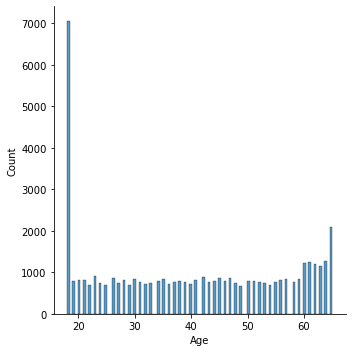

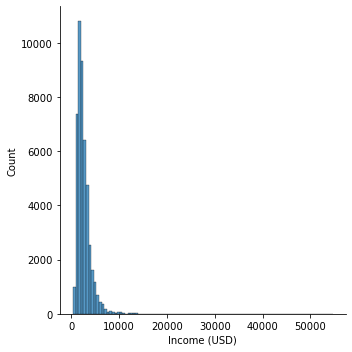

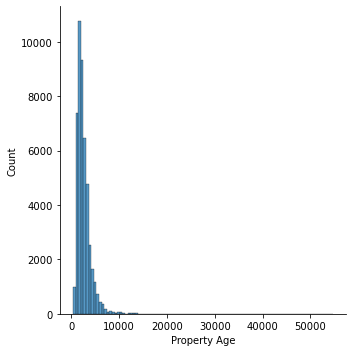

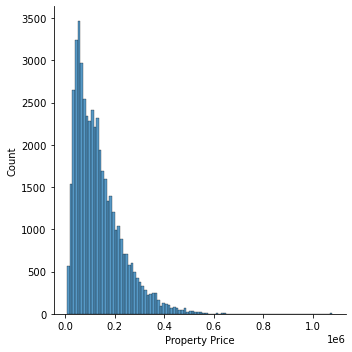

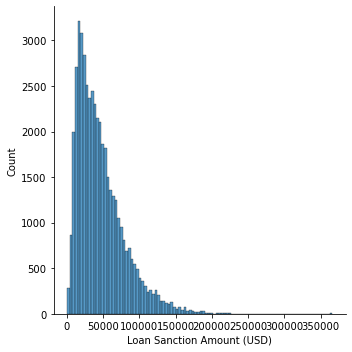

In [44]:
# kiem tra bien nao la bien so thi ve cot
from pandas.api.types import is_numeric_dtype
for column in house.columns.tolist():
    if is_numeric_dtype(house[column]):
        sns.displot(x=column, data=house, bins=100)

In [45]:
# kiem tra bien Income Stability co nhung loai gia tri nao
house['Income Stability'].unique()

array(['Low', 'High'], dtype=object)

In [46]:
# kiem tra bien Property Location co nhung loai gia tri nao
house['Property Location'].unique()

array(['Rural', 'Urban', 'Semi-Urban'], dtype=object)

In [47]:
# chuyen hoa thanh dang so cho nhung cot khong o dang so
normalized_house = house.copy()
normalized_house["Gender"] = normalized_house["Gender"].apply(lambda x: 0 if x=="M" else 1)
normalized_house["Income Stability"] = normalized_house["Income Stability"].apply(lambda x: 0 if x=="Low" else 1)
normalized_house["Property Location"] = normalized_house["Property Location"].apply(lambda x: 0 if x=="Rural" else 1 if x=="Urban" else 2 if x=="Semi-Urban"else 3 )
normalized_house

,Gender,Age,Income (USD),Income Stability,Property Age,Property Location,Property Price,Loan Sanction Amount (USD)
0,1,19,1641.25,0,1651.25,0,59641.82,21026.420753
1,0,29,1989.71,0,1990.71,1,179858.51,60595.183366
2,1,37,1849.91,0,1856.91,0,117297.62,39181.648002
3,0,65,2735.18,1,2747.18,0,354417.72,128497.710865
4,1,62,4741.78,1,4740.78,1,82049.80,39386.919336
...,...,...,...,...,...,...,...,...
47292,1,62,2121.48,0,2135.48,0,240291.63,78800.491330
47293,0,38,1506.72,0,1505.72,0,218431.37,72483.293359
47294,1,20,1595.10,0,1582.10,2,154458.88,52462.861498
47295,1,50,2002.27,0,2007.27,2,72277.78,22909.596763


In [48]:
# ma tran hiep phuong sai
house.corr()

,Age,Income (USD),Property Age,Property Price,Loan Sanction Amount (USD)
Age,1.000000,-0.044086,-0.044085,-0.003274,-0.000115
Income (USD),-0.044086,1.000000,0.999986,0.358110,0.392897
Property Age,-0.044085,0.999986,1.000000,0.358110,0.392892
Property Price,-0.003274,0.358110,0.358110,1.000000,0.994429
Loan Sanction Amount (USD),-0.000115,0.392897,0.392892,0.994429,1.000000


<AxesSubplot:>

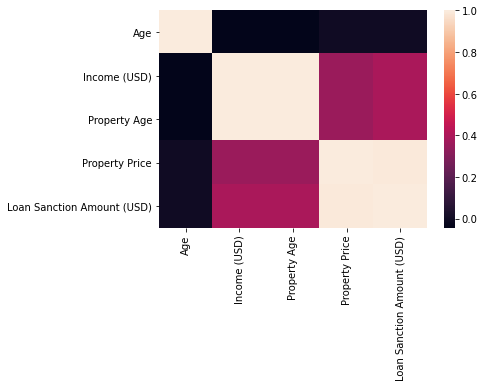

In [49]:
#viet heat map cho ma tran hiep phuong sai
sns.heatmap(house.corr())

In [50]:
# chia X, y tu dataset
columns = normalized_house.columns.tolist()     # Columns name
columns.remove('Loan Sanction Amount (USD)')    # Remove y label (column charges in this case)
feature_data = normalized_house[columns]        # X 
target_data = normalized_house['Loan Sanction Amount (USD)']     # y

In [51]:
#chuan hoa du lieu 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature_data = scaler.fit_transform(feature_data)
feature_data

array([[ 0.99913267, -1.30577356, -0.60683844, ..., -0.60037513,
        -1.22027904, -0.79769356],
       [-1.00086808, -0.68413012, -0.38313112, ..., -0.38245428,
        -0.01075113,  0.47318951],
       [ 0.99913267, -0.18681536, -0.47288112, ..., -0.46834896,
        -1.22027904, -0.18817936],
       ...,
       [ 0.99913267, -1.24360922, -0.63646621, ..., -0.64476689,
         1.19877678,  0.20467472],
       [ 0.99913267,  0.62132112, -0.37506774, ..., -0.37182336,
         1.19877678, -0.66411122],
       [ 0.99913267,  0.37266374, -1.34405955, ..., -1.34077706,
        -1.22027904, -1.16816703]])

In [52]:
from sklearn.model_selection import train_test_split
#chia tap test va train
trainX, testX ,trainY, testY = train_test_split(feature_data, target_data, train_size=0.70, random_state=18)
print('Training:' + str(trainX.shape))
print('Test:' + str(testX.shape))

Training:(33075, 7)
Test:(14176, 7)


In [53]:
from sklearn.linear_model import LinearRegression
# su dung mo hinh linear regression
reglinear = LinearRegression(fit_intercept=True)   

In [54]:
reglinear.fit(trainX,trainY)

LinearRegression()

In [55]:
print(reglinear.coef_ ) # he so goc
print()
print(reglinear.intercept_) # bias

[  130.08208744 -1271.12828766   840.9910257   3172.45792564
   759.44811946  -107.24922892 31798.84393963]

46478.869999315


Learn on sklearn how to use Ridge, Lasso, and ElasticNet compare the error of all 3 algorithms with Linear Regression (https://scikit-learn.org/stable/index.html)

### Ridge regression dung de lam cho model khong bi overfitting.

In [56]:
from sklearn import linear_model
# alpha  = 0.5 khi alpha cang lon thi regularization 
# lon lam giam viec bi overfitting nhung co the lam model bi bias
regRidge = linear_model.Ridge(alpha=0.5)
regRidge.fit(trainX,trainY)

Ridge(alpha=0.5)

### Lasso regression cung tuong tu nhu Ridge regression. no thuong duoc dung trong feature selection va giam bi overfitting cua model

In [57]:
from sklearn import linear_model
# alpha  = 0.5 khi alpha cang lon thi regularization 
# lon lam giam viec bi overfitting nhung co the lam model bi bias
reglasso = linear_model.Lasso(alpha=0.1)
reglasso.fit(trainX,trainY)

Lasso(alpha=0.1)

### Elastic Net no su dung L1 va L2 regularization 

In [58]:
from sklearn.linear_model import ElasticNet
regEla = ElasticNet(alpha=0.5, l1_ratio=0.5)
regEla.fit(trainX, trainY)

ElasticNet(alpha=0.5)

In [59]:
from sklearn.metrics import mean_absolute_error
# du doan tren tap test
linear_pred = reglinear.predict(testX)
ridge_pred = regRidge.predict(testX)
lasso_pred = reglasso.predict(testX)
elastic_pred = regEla.predict(testX)
# tinh MSE cho tung model
linear_mse = mean_absolute_error(testY, linear_pred)
ridge_mse = mean_absolute_error(testY, ridge_pred)
lasso_mse = mean_absolute_error(testY, lasso_pred)
elastic_mse = mean_absolute_error(testY, elastic_pred)
# sai so cua 4 model linearRegression, Ridge, Lasso, ElasticNet
print(f"Linear Regression MSE: {linear_mse}")
print(f"Ridge Regression MSE: {ridge_mse}")
print(f"Lasso Regression MSE: {lasso_mse}")
print(f"ElasticNet Regression MSE: {elastic_mse}")

Linear Regression MSE: 118.54521660609981
Ridge Regression MSE: 118.53562081357678
Lasso Regression MSE: 118.58007216823027
ElasticNet Regression MSE: 5073.692172740323


Let's try Polynomial of order 2 to compare the previous results. What will the result be if we choose the n order too high?

In [60]:
#Linear Regression with Polynomial Transform
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(2, include_bias=False), LinearRegression())
poly_model.fit(trainX, trainY)  
pred = poly_model.predict(testX)
mean_absolute_error(y_pred=pred, y_true=testY) 

136.92054561917323

In [61]:
# so sanh tren tap test
print(f"Linear Regression MAE: {linear_mse}")
print(f"Ridge Regression MAE: {ridge_mse}")
print(f"Lasso Regression MAE: {lasso_mse}")
print(f"ElasticNet Regression MAE: {elastic_mse}")
print(f"Polynomial of order 2 MAE: {mean_absolute_error(y_pred=pred, y_true=testY)}")

Linear Regression MAE: 118.54521660609981
Ridge Regression MAE: 118.53562081357678
Lasso Regression MAE: 118.58007216823027
ElasticNet Regression MAE: 5073.692172740323
Polynomial of order 2 MAE: 136.92054561917323


In [62]:
#khi n lon error kha lon so voi ban dau. va mat nhieu thoi gian de chay
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(6, include_bias=False), LinearRegression())
poly_model.fit(trainX, trainY)  
pred = poly_model.predict(testX)
mean_absolute_error(y_pred=pred, y_true=testY)

182.71893456800439